## Notebook to make a exporatory analysis of the dataset that was extracted

In [1]:
import json
import seaborn as sns
import pandas as pd
import glob
from matplotlib import pyplot as plt
sns.set(font_scale=1.3)

## Reading the data

In [2]:
all_questions = []

for arq_json in glob.glob("data/cleaned/*.json"):
    with open(arq_json,'r') as file:
        all_questions.extend(json.loads(file.read()))
        
data_df = pd.DataFrame(all_questions)

In [3]:
data_df

,description,alternatives,year,subject,ground_truth,index_question
0,Questão 4) A Minor Bird I have wished a bird w...,"[A) culpa por não poder cuidar do pássaro., B)...",2020,"Linguagens, códigos e suas tecnologias",D,4
1,"Questão 5) Finally, Aisha finished with her cu...","[A) reforçam um padrão de beleza., B) retratam...",2020,"Linguagens, códigos e suas tecnologias",C,5
2,Questão 01) Pablo Pueblo Regresa un hombre en ...,[A) contrapor a individualidade de um sujeito ...,2020,"Linguagens, códigos e suas tecnologias",A,6
3,"Questão 4) Oye, Pito, ésta es: la vida bruta d...",[A) rejeição da língua utilizada por seus ante...,2020,"Linguagens, códigos e suas tecnologias",E,9
4,Questão 5) Poco después apareció en casa de El...,[A) determinação para conduzir discussões pess...,2020,"Linguagens, códigos e suas tecnologias",E,10
...,...,...,...,...,...,...
1001,QuESTÃO 167) Em um jogo disputado em uma mesa ...,"[A) Arthur, pois a soma que escolheu é a menor...",2011,Matemática e suas tecnologias,C,172
1002,QuESTÃO 168) É possível usar água ou comida pa...,"[A) 20 mL., B) 24 mL., C) 100 mL., D) 120 mL.,...",2011,Matemática e suas tecnologias,C,173
1003,"QuESTÃO 171) Nos últimos cinco anos, 32 mil mu...","[A) 4 mil., B) 9 mil., C) 21 mil., D) 35 mil.,...",2011,Matemática e suas tecnologias,D,176
1004,QuESTÃO 174) O setor de recursos humanos de um...,"[A) 24., B) 31., C) 32., D) 88., E) 89.]",2011,Matemática e suas tecnologias,E,179


In [4]:
data_df.to_csv("data/cleaned/all_questions_df.csv",index=False)

## Analysing the distribuition on the years

In [5]:
data_gg = data_df[['year','description']].groupby("year").count().reset_index()
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
for y in years:
    if not(str(y) in list(data_gg['year'])):
        data_gg.loc[len(data_gg.index)] = [str(y),0]
data_gg = data_gg.sort_values(by='year')
data_gg = data_gg.rename(columns={"year":"Year","description":"Count"})

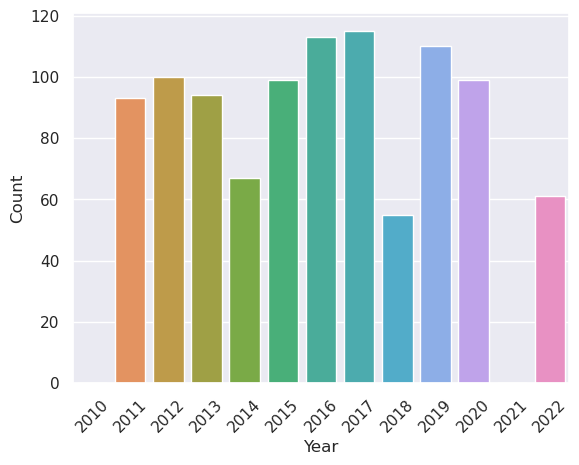

In [6]:
sns.set_theme()
pp = sns.barplot(data=data_gg,x='Year',y='Count')
plt.xticks(rotation=45)
# plt.title("Distribuição de questões extraídas por ano")
plt.savefig("plots/question-year.svg",format="svg")

## Analysis of the amount of questions by knowledge area

In [7]:
data_gg = data_df[['subject','description']].groupby('subject').count().reset_index()
data_gg = data_gg.rename(columns = {"subject":"Knowledge area","description":"Count"})

In [9]:
mape = {
    "Ciências da natureza e suas tecnologias": "Natural sciences",
    "Ciências humanas e suas tecnologias": "Human sciences",
    "Linguagens, códigos e suas tecnologias": "Language, codes",
    "Matemática e suas tecnologias": "Mathematics"
}

data_gg['Knowledge area'] = data_gg['Knowledge area'].apply(lambda x: mape[x])

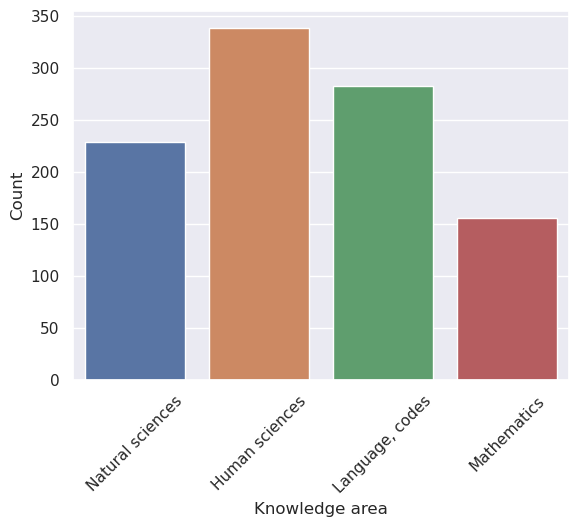

In [10]:
sns.set_theme()
pp = sns.barplot(data=data_gg,x='Knowledge area',y='Count')
plt.xticks(rotation=45)
# plt.title("Distribuição de questões por área de conhecimento")
plt.savefig("plots/question-knowlege-area.svg",format="svg")